In [23]:
#file_path = All_pages_text.txt
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

Current directory: /Users/mymac/code/LenkaBells/WebScraping


In [5]:
file_name = "All_Pages_text.txt"
file_path = current_dir / file_name
print(f"Full path to file: {file_path}")

Full path to file: /Users/mymac/code/LenkaBells/WebScraping/All_Pages_text.txt


In [8]:
# Sample data (replace this with your actual input data)
file_path = "/Users/mymac/code/LenkaBells/WebScraping/All_Pages_text.txt"

data = []

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

In [ ]:
# Organisations and # of projects only
# Initialize the results list
results = []

# Loop through the data
for i, line in enumerate(data):
    if "WITH TITLE:" in line and i + 1 < len(data) and "LIST:" in data[i + 1]:
        # Extract the organization name
        org_name = line.split("WITH TITLE:")[1].strip()
        
        # Extract the number of projects from the next line
        projects_str = data[i + 1].split("LIST:")[1].strip()
        
        # Clean up the projects_str to remove any extra characters
        projects_str = projects_str.strip("[]'\" ")  # Remove brackets, quotes, and spaces
        projects_num = int(projects_str) if projects_str.isdigit() else 0
        
        # Append the extracted data to the results list
        results.append((org_name, projects_num))

# Print the results
for org_name, projects_num in results:
    print(f"Organization: {org_name}, Projects: {projects_num}")

# Optional: Convert results into a pandas DataFrame
import pandas as pd
df = pd.DataFrame(results, columns=["Organization", "Projects"])
#print(df)

In [16]:
# Count of unique organizations 
# EU website: 7940
num_organizations = df['Organization'].nunique()

print(f"Number of organizations: {num_organizations}")

Number of organizations: 7382


In [17]:
# Count all organizations, including duplicates
# EU website: 7940
total_organizations = len(df)

print(f"Total organizations (including duplicates): {total_organizations}")

Total organizations (including duplicates): 7934


In [ ]:
# Create a for loop for organizations with project titles

results = []

current_org = None
current_projects = []
num_projects = 0

for line in data:
    if "WITH TITLE:" in line:
        current_org = line.split("WITH TITLE:")[1].strip()
        current_projects = [] 
        num_projects = 0       
    
    elif "LIST:" in line:
        list_str = line.split("LIST:")[1].strip()
        num_projects = int(list_str.strip("[]'\" ")) if list_str.strip("[]'\" ").isdigit() else 0

    elif "TITLE:" in line and current_org:
        project_title = line.split("TITLE:")[1].strip()
        current_projects.append(project_title)
    
    elif "NO OF PROJECTS:" in line:
        no_of_projects = int(line.split("NO OF PROJECTS:")[1].strip())
        num_projects = max(num_projects, no_of_projects)  
    
    elif "Reached the bottom of the page." in line and current_org:
       
        results.append((current_org, num_projects, current_projects))
        current_org = None  

for org, count, projects in results:
    print(f"Organization: {org}, Projects: {count}, Titles: {projects}")

df_p = pd.DataFrame(results, columns=["Organization", "Projects", "Titles"])
print(df_p)

In [20]:
from IPython.display import display

# Display the DataFrame
display(df_p)

,Organization,Projects,Titles
0,uniquee s.r.o.,0,[]
1,LEOPARD PRODUCTION s.r.o.,0,[]
2,novuma s. r. o.,0,[]
3,"AIR TREND, s.r.o.",0,[]
4,SFERA AS,0,[]
...,...,...,...
7935,USTAV MATERIALOVEHO VYSKUMU SLOVENSKEJ AKADEMI...,4,"[Macro, Micro and Nano Aspects of Machining, R..."
7936,OBCIANSKA SIET STREDNEJ A VYCHODNEJEUROPY ZDRU...,1,[PEP-NET: Pan European E-Participation Network]
7937,SPINEA SRO,2,[Predictive Cognitive Maintenance Decision Sup...
7938,VYSOKA SKOLA BEZPECNOSTNEHO MANAZERSTVA V KOSI...,3,[Understand the Dimensions of Organised Crime ...


In [29]:
# Orgs with highest project count
max_projects = max(df['Projects'])
print(max_projects)

125


In [ ]:
# Orgs with 1 project
count_orgs_with_1_project = df[df['Projects'] > 1].shape[0]
print(count_orgs_with_1_project)

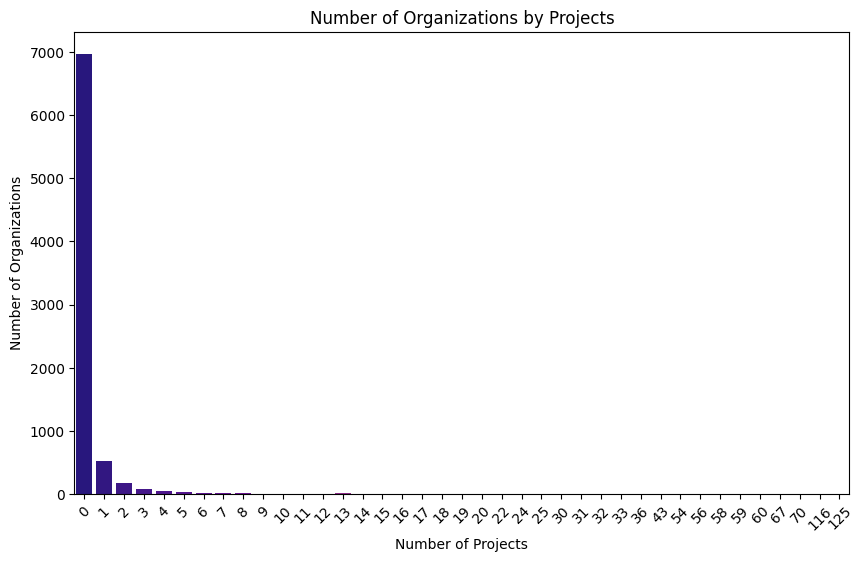

In [41]:
# Count organizations by number of projects
project_counts = df_p['Projects'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=project_counts.index, y=project_counts.values, palette='plasma')
plt.title('Number of Organizations by Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Organizations')
plt.xticks(rotation=45)
plt.show()

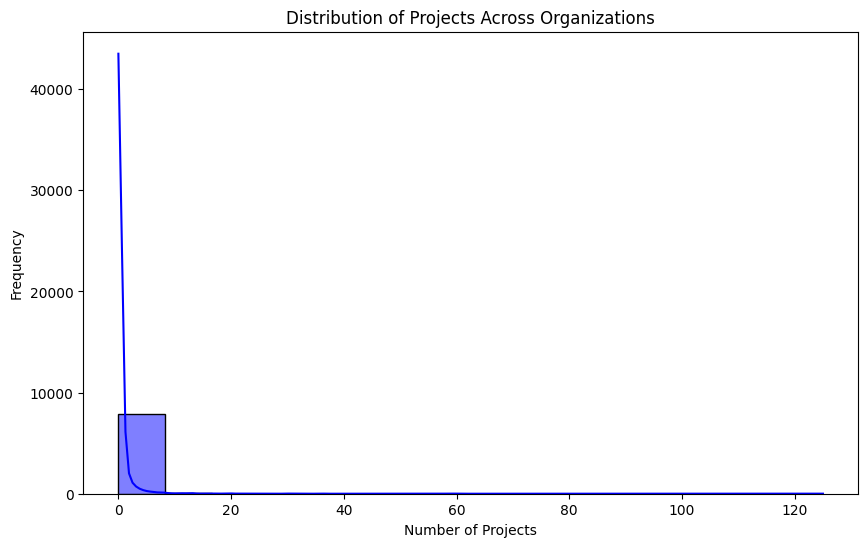

In [25]:
# Create a histogram to show the distribution of projects
plt.figure(figsize=(10, 6))
sns.histplot(df_p['Projects'], bins=15, kde=True, color='blue')
plt.title('Distribution of Projects Across Organizations')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
plt.show()

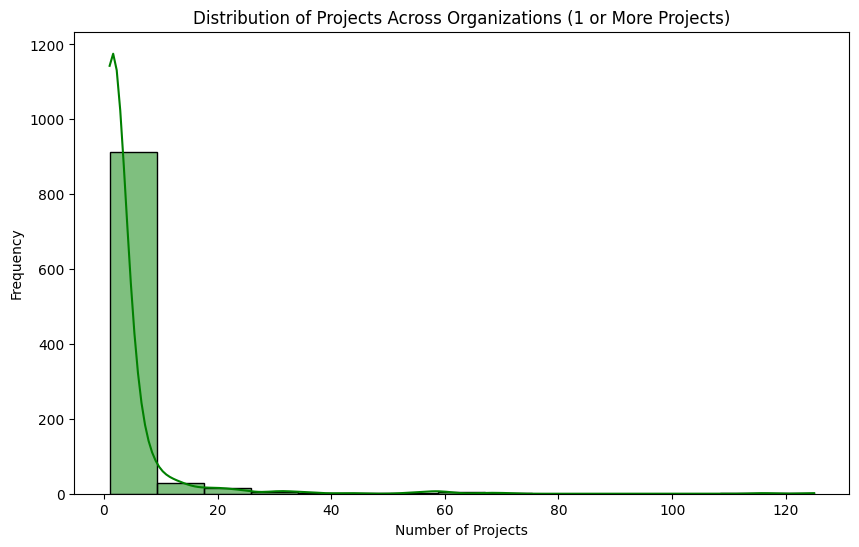

In [32]:
# Filter to include only organizations with 1 or more projects
filtered_df = df[df['Projects'] > 0]

# Create a histogram to show the distribution of projects (1 and above)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Projects'], bins=15, kde=True, color='green')
plt.title('Distribution of Projects Across Organizations (1 or More Projects)')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
plt.show()

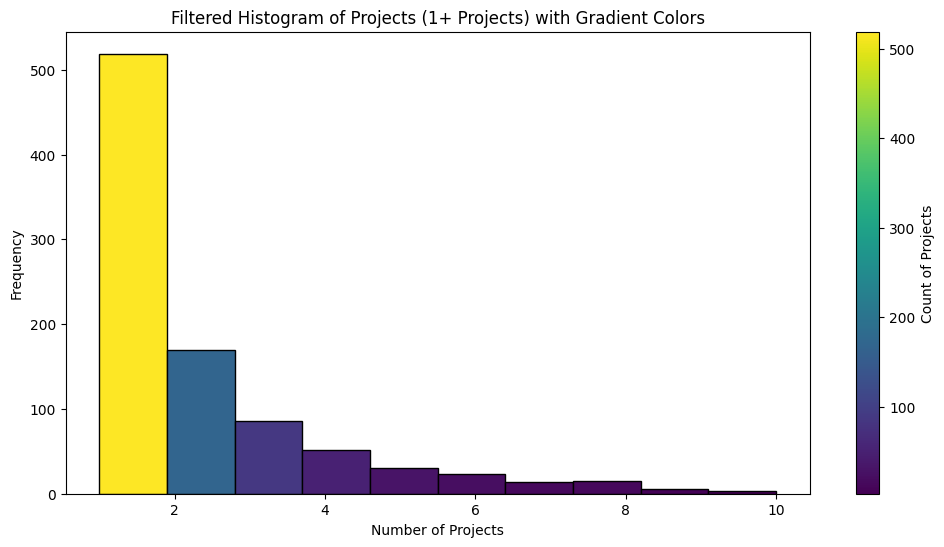

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter to include only organizations with 1 or more projects
filtered_df_gradient = df[(df['Projects'] > 0) & (df['Projects'] <= 10)]

# Create the histogram
plt.figure(figsize=(12, 6))
hist_data, bins, patches = plt.hist(filtered_df_gradient['Projects'], bins=10, edgecolor="black")

# Apply a gradient color to the bars
cmap = plt.cm.viridis  # Use a colormap
normalize = plt.Normalize(vmin=min(hist_data), vmax=max(hist_data))  # Normalize counts for gradient

for count, patch in zip(hist_data, patches):
    plt.setp(patch, facecolor=cmap(normalize(count)))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, label="Count of Projects")

# Customize the chart
plt.title("Filtered Histogram of Projects (1+ Projects) with Gradient Colors")
plt.xlabel("Number of Projects")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Save the DataFrame to Excel or csv
#filtered_df_for_export = df_p[(df_p['Projects'] > 0)]
#filtered_df_for_export.to_excel("organizations_projects.xlsx", index=False)